In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
wt_promoter = "TTTACACTTTATGCTTCCGGCTCGTATGTT"

In [3]:
# load in Brewster energy matrix
matrix = pd.read_csv("../../data/brewster_matrixS2.txt", header=None, sep = "\s+", comment="#")
matrix.columns = ["A","C","G","T"]
matrix = matrix[5:-6].reset_index(drop=True)
matrix.head()

A         C         G         T
0  0.305961  0.681616  0.360140 -0.313427
1  0.122283  0.247441  0.171605 -0.313427
2  1.500683  1.490967 -0.313427  0.633869
3 -0.313427  1.032246 -0.138758  0.699062
4  1.064641 -0.214039  1.119622 -0.313427

In [4]:
# define the binding energy function
def binding_energy(seq, matrix):
    """
    Inputs:
        seq: string, 30 bp sequence 
        matrix: pandas dataframe, binding energy matrix
    Outputs:
        binding energy: float"""
    
    # make sure the sequence is capitilized
    seq = seq.upper()
    
    # initilize running tally
    tally_energy = 0
    
    # iterate through the basepairs of the sequence
    for i, bp in enumerate(seq):
        
        # determine energy of given bp and add to tally
        bp_e = matrix.at[i,bp]
        tally_energy = tally_energy + bp_e
        
    return tally_energy

In [5]:
wt_energy = binding_energy(wt_promoter, matrix)
wt_energy

-3.2440813500089694

In [6]:
def all_SNPs_binding_energy(sequences, matrix):
    """ Calculates the binding energy of all possible sequences resulting from a single point mutations
    about the sequence(s) provided.
    This can allow for subsequent use of the function to get all single mutants, double mutants, etc.
    """
    
    # initialize a names, sequence, and energies list
    seqs = []
    energies = []
    
    for sequence in sequences:
        
        sequence = sequence.upper()
    
        for i, bp in enumerate(sequence):

            # possible bases:
            bases = ['A', 'T', 'C', 'G']

            # remove the base pair which is already in the sequence from the bases list
            bases.remove(bp)

            # make each possible mutation and store it in a list
            for base in bases:

                # determine the new sequence, calculate its energy, and store it
                seq = sequence[:i] + base + sequence[i+1:]
                energy = binding_energy(seq, matrix)
                seqs += [seq]
                energies += [energy]

            
    # return a data frame
    df = pd.DataFrame(columns=["sequence", "energy"])
    df["sequence"] = seqs
    df["energy"] = energies
    return df

## Single mutants 

In [7]:
single_muts = all_SNPs_binding_energy([wt_promoter], matrix)
single_muts.tail()

sequence    energy
85  TTTACACTTTATGCTTCCGGCTCGTATGCT -3.774452
86  TTTACACTTTATGCTTCCGGCTCGTATGGT -3.289536
87  TTTACACTTTATGCTTCCGGCTCGTATGTA -2.254904
88  TTTACACTTTATGCTTCCGGCTCGTATGTC -1.716471
89  TTTACACTTTATGCTTCCGGCTCGTATGTG -1.937952

In [7]:
def ECDF(x_vals):
    
    plt.plot(sorted(x_vals), np.linspace(0,1,len(x_vals)), '.')
    plt.axvline(x=binding_energy(wt_promoter, matrix), color='r')
    plt.legend(["mutants", "wt promoter"])
    plt.xlabel("binding energy")
    plt.ylabel("ECDF")

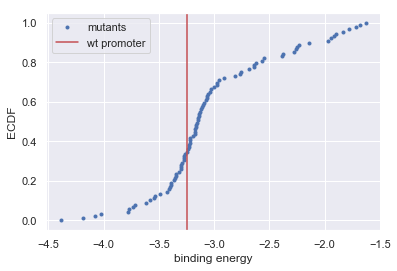

In [9]:
ECDF(single_muts["energy"])

## Double mutants

In [10]:
double_muts = all_SNPs_binding_energy(single_muts["sequence"], matrix)
double_muts.tail()

sequence    energy
8095  TTTACACTTTATGCTTCCGGCTCGTATGCG -2.468323
8096  TTTACACTTTATGCTTCCGGCTCGTATGGG -1.983407
8097  TTTACACTTTATGCTTCCGGCTCGTATGTA -2.254904
8098  TTTACACTTTATGCTTCCGGCTCGTATGTT -3.244081
8099  TTTACACTTTATGCTTCCGGCTCGTATGTC -1.716471

In [11]:
double_muts.drop_duplicates(inplace=True)
double_muts.tail()

sequence    energy
7828  TTTACACTTTATGCTTCCGGCTCGTATGGC -1.761926
7829  TTTACACTTTATGCTTCCGGCTCGTATGGG -1.983407
7918  TTTACACTTTATGCTTCCGGCTCGTATGTC -1.716471
7919  TTTACACTTTATGCTTCCGGCTCGTATGTG -1.937952
8007  TTTACACTTTATGCTTCCGGCTCGTATGTA -2.254904

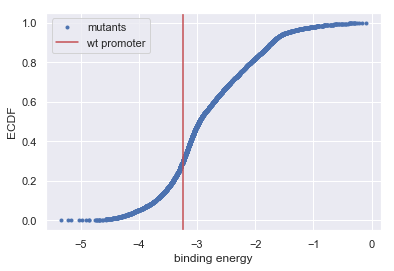

In [12]:
ECDF(double_muts["energy"])

## Triple mutants

In [13]:
triple_muts = all_SNPs_binding_energy(double_muts["sequence"], matrix)
triple_muts.tail()

sequence    energy
360535  TTTACACTTTATGCTTCCGGCTCGTATGCA -2.785274
360536  TTTACACTTTATGCTTCCGGCTCGTATGGA -2.300359
360537  TTTACACTTTATGCTTCCGGCTCGTATGTT -3.244081
360538  TTTACACTTTATGCTTCCGGCTCGTATGTC -1.716471
360539  TTTACACTTTATGCTTCCGGCTCGTATGTG -1.937952

In [14]:
triple_muts.drop_duplicates(inplace=True)
triple_muts.tail()

sequence    energy
359368  TTTACACTTTATGCTTCCGGCTCGTATGGC -1.761926
359369  TTTACACTTTATGCTTCCGGCTCGTATGGG -1.983407
359458  TTTACACTTTATGCTTCCGGCTCGTATGAC -2.548118
359459  TTTACACTTTATGCTTCCGGCTCGTATGAG -2.769600
359547  TTTACACTTTATGCTTCCGGCTCGTATGAA -3.086551

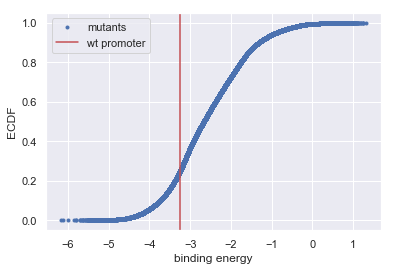

In [15]:
ECDF(triple_muts["energy"])

## Focusing on -10 and -35 mutatnts

In [8]:
energies = np.zeros(4**12)
seqs = np.array(["X"*30]*4**12) 
count = 0
print_counter = 0 

# Lord forgive me for the code I am about to write
for bp1 in ['A','T','C','G']:
    
    for bp2 in ['A','T','C','G']:
        
        # print occasional progress
        print(print_counter)
        print_counter += 1
        
        for bp3 in tqdm(['A','T','C','G']):
            
            for bp4 in ['A','T','C','G']:
                
                for bp5 in ['A','T','C','G']:
                    
                    for bp6 in ['A','T','C','G']:
                        
                        for bp7 in ['A','T','C','G']:
                            
                            for bp8 in ['A','T','C','G']:
                                
                                for bp9 in ['A','T','C','G']:
                                    
                                    for bp10 in ['A','T','C','G']:
                                        
                                        for bp11 in ['A','T','C','G']:
                                            
                                            for bp12 in ['A','T','C','G']:
                                                
                                                # construct sequence and save
                                                seq = bp1 + bp2 + bp3 + bp4 + bp5 + bp6 + wt_promoter[6:24] + bp7 + bp8 + bp9 + bp10 + bp11 + bp12
                                                seqs[count] = seq
                                                
                                                # compute enegery and save
                                                energies[count] = binding_energy(seq, matrix)
                                                
                                                # update count
                                                count += 1

  0%|          | 0/4 [00:00<?, ?it/s]

0


  0%|          | 0/4 [00:00<?, ?it/s]

1


  0%|          | 0/4 [00:00<?, ?it/s]

2


  0%|          | 0/4 [00:00<?, ?it/s]

3


  0%|          | 0/4 [00:00<?, ?it/s]

4


  0%|          | 0/4 [00:00<?, ?it/s]

5


  0%|          | 0/4 [00:00<?, ?it/s]

6


  0%|          | 0/4 [00:00<?, ?it/s]

7


  0%|          | 0/4 [00:00<?, ?it/s]

8


  0%|          | 0/4 [00:00<?, ?it/s]

9


  0%|          | 0/4 [00:00<?, ?it/s]

10


  0%|          | 0/4 [00:00<?, ?it/s]

11


  0%|          | 0/4 [00:00<?, ?it/s]

12


  0%|          | 0/4 [00:00<?, ?it/s]

13


  0%|          | 0/4 [00:00<?, ?it/s]

14


  0%|          | 0/4 [00:00<?, ?it/s]

15


100%|██████████| 4/4 [01:57<00:00, 29.44s/it]


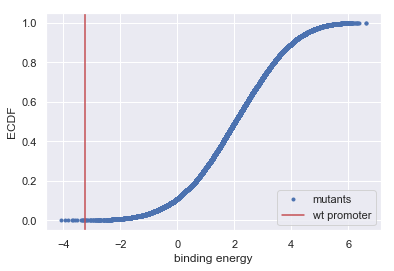

In [9]:
ECDF(energies[::1000])

In [10]:
wt_energy = binding_energy(wt_promoter, matrix)
sum(energies < wt_energy)

14339

In [11]:
14339 / len(energies)

0.0008546710014343262

In [27]:
d = {'sequence': seqs, 'energy': energies}
df = pd.DataFrame(data=d)

In [28]:
df.head()

sequence    energy
0  AAAAAACTTTATGCTTCCGGCTCGAAAAAA  0.219631
1  AAAAAACTTTATGCTTCCGGCTCGAAAAAT -0.769547
2  AAAAAACTTTATGCTTCCGGCTCGAAAAAC  0.758063
3  AAAAAACTTTATGCTTCCGGCTCGAAAAAG  0.536582
4  AAAAAACTTTATGCTTCCGGCTCGAAAATA  1.051278

In [29]:
df.to_csv("all_10_and_35_mutant_energies.csv", index=False)

In [33]:
df_trimmed = df[df["energy"] < binding_energy(wt_promoter, matrix)]
df_trimmed.to_csv("10_and_35_mutants_stronger_than_wt.csv", index=False)